<a href="https://colab.research.google.com/github/dmitriy-iliyov/data-science/blob/main/neural-network/lab_5/notebook/lab_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
datasets_dir = '/content/drive/MyDrive/data/dogs'

In [ ]:
import os

os.makedirs('/root/.kaggle', exist_ok=True)
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

paths = [
    'jessicali9530/stanford-dogs-dataset',
    'khushikhushikhushi/dog-breed-image-dataset',
    'yapwh1208/dogs-breed-dataset',
    'amandam1/120-dog-breeds-breed-classification',
]

for path in paths:
    dir_name = path.split('/')[1]
    current_dir_path = os.path.join(datasets_dir, dir_name)

    os.makedirs(current_dir_path, exist_ok=True)

    !kaggle datasets download -d {path} -p {current_dir_path}

    zip_file_path = os.path.join(current_dir_path, f"{dir_name}.zip")
    !unzip -q {zip_file_path} -d {current_dir_path}

    os.remove(zip_file_path)

In [ ]:
import os
import shutil

datasets_dir = '/content/drive/MyDrive/data/dogs'
image_dir = os.path.join(datasets_dir, 'dogs-breed-dataset', 'dog_v1')

class_names_list = []
class_paths_list = []

for filename in os.listdir(image_dir):
    file_path = os.path.join(image_dir, filename)
    fl = filename.lower()
    class_names_list.append(fl)
    class_paths_list.append(file_path)

class_names_list.sort()
class_paths_list.sort()

for dir in os.listdir(datasets_dir):
    dir_path = os.path.join(datasets_dir, dir)
    if os.path.isdir(dir_path) and dir != 'dogs-breed-dataset':
        for _class in os.listdir(dir_path):
          for class_name in class_names_list:
            if class_name in _class.lower():
                class_index = class_names_list.index(class_name)
                destination_class_path = class_paths_list[class_index]

                source_class_path = os.path.join(dir_path, _class)
                for item in os.listdir(source_class_path):
                    source_path = os.path.join(source_class_path, item)
                    destination_path = os.path.join(destination_class_path, item)
                    shutil.move(source_path, destination_path)

for filename in os.listdir(image_dir):
    print(filename + ' ' + str(len(os.listdir(os.path.join(image_dir, filename)))))

In [ ]:
import tensorflow as tf
import os

datasets_dir = '/content/drive/MyDrive/data/dogs'
image_dir = os.path.join(datasets_dir, 'dogs-breed-dataset', 'dog_v1')

width = 224
height = 224
batch_size = 32

train_dataset = tf.keras.utils.image_dataset_from_directory(image_dir,
                                                              image_size = (width, height),
                                                              batch_size = batch_size,
                                                              label_mode="categorical",
                                                              validation_split = .15,
                                                              subset = 'training',
                                                              seed = 341)

val_dataset = tf.keras.utils.image_dataset_from_directory (image_dir,
                                                             image_size = (width, height),
                                                             batch_size = batch_size,
                                                             label_mode="categorical",
                                                             validation_split = .15,
                                                             subset = 'validation',
                                                             seed = 341)
print(train_dataset.class_names)

In [ ]:
from keras.src.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.applications import InceptionV3
import time
import tensorflow as tf
import numpy as np
from keras import Sequential, Input
from keras.src.layers import GlobalAveragePooling2D, Dense
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, ZeroPadding2D, Dropout
from keras.optimizers import Adam
from matplotlib import pyplot as plt


class CustomInceptionV3:

    def __init__(self, classes_count = 5):
        base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        base_model.trainable = False

        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(1024, activation='relu')(x)
        predictions = Dense(classes_count, activation='softmax')(x)
        self.model = Model(inputs=base_model.input, outputs=predictions)

        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        self.store_path = '/content/drive/MyDrive/main/languages/Python/neural_network/labs/lab_5/model'

    def fit(self, train_dataset, val_dataset, epochs=90):
        start = time.time()
        history = self.model.fit(train_dataset, validation_data=val_dataset, epochs=epochs)
        execution_time = time.time() - start
        self.model.save(self.store_path + '/model.keras')
        self.plot_history(history, epochs, execution_time)

    def evaluate(self, test_dataset):
        test_loss, test_accuracy = self.model.evaluate(test_dataset)
        print(f"Test accuracy: {test_accuracy:.3f}")

    def print(self):
        print(self.model.summary())

    @staticmethod
    def plot_history(history, epochs, execution_time):
        plt.figure(figsize=(12, 4))

        plt.subplot(1, 2, 1)
        plt.plot(range(1, epochs + 1), history.history['accuracy'], label='Training Accuracy')
        plt.plot(range(1, epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title(f'Accuracy (Execution Time: {execution_time:.2f} seconds)')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(range(1, epochs + 1), history.history['loss'], label='Training Loss')
        plt.plot(range(1, epochs + 1), history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss')
        plt.legend()

        plt.show()

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 311s 5s/step - accuracy: 0.2950 - loss: 8.8433 - val_accuracy: 0.3323 - val_loss: 4.8750
Epoch 2/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 55s 641ms/step - accuracy: 0.4412 - loss: 3.2804 - val_accuracy: 0.3811 - val_loss: 4.3003
Epoch 3/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 36s 547ms/step - accuracy: 0.4627 - loss: 3.3228 - val_accuracy: 0.3780 - val_loss: 3.9301
Epoch 4/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 33s 559ms/step - accuracy: 0.4724 - loss: 2.5342 - val_accuracy: 0.4207 - val_loss: 3.5440
Epoch 5/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 46s 645ms/step - accuracy: 0.5627 - loss: 2.0313 - val_accuracy: 0.3689 - val_loss: 3.8190
Epoch 6/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 33s 556ms/step - accuracy: 0.5938 - loss: 1.7239 - val_accuracy: 0.4207 - val_loss: 3.4006
Epoch 7/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 38s 641ms/step - accuracy: 0.6302 - loss: 1.4623 - val_accuracy: 0.4756 - val_loss: 3.0386
Epoch 8/20
59/59 ━━━━━━━━━━━━━━━━━━━━ 40s 636ms/

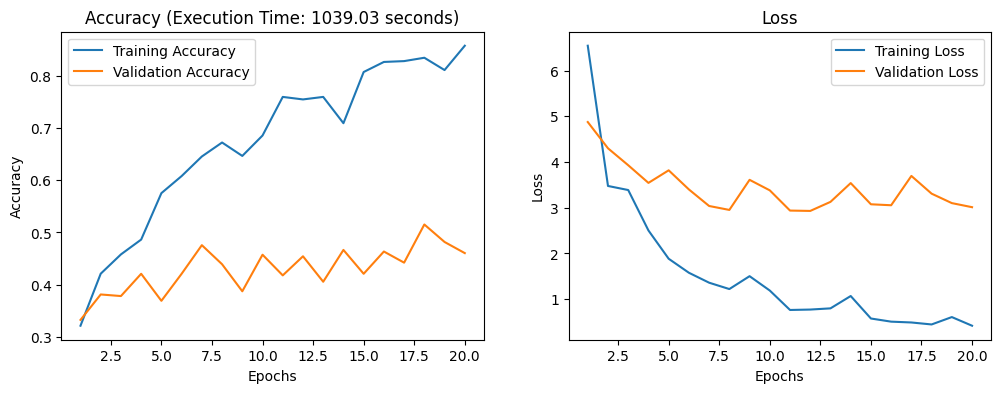

In [ ]:
inceptionv3= CustomInceptionV3()
with tf.device('/GPU:0'):
    inceptionv3.fit(train_dataset, val_dataset, epochs=20)